# Plotting data

The graphical representation of data plotting is one of the most important tools for evaluating and understanding scientific data and theoretical predictions. However, plotting is not a part of core Python but is provided through one of several possible library modules. The de factor standard for plotting in Python is MatPlotLib. There are nevertheless several other very good modules like PlotLy, Seaborn, Bokeh and other available. 

Because MatPlotLib is an external library (in fact it’s a collection of libraries) it must be imported into any routine that uses it. MatPlotLib makes extensive use of NumPy so the two should be imported together. Therefore, for any program for which you would like to produce 2-d plots, you should include the lines

~~~
import numpy as np
import matplotlib.pyplot as plt
~~~

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%config InlineBackend.figure_format = 'retina'

We can set some of the parameters for the appearance of graphs globally. In case you still want to modify a part of it, you can set individual parameters later during plotting. The command used here is the 

~~~
plt.rcParams.update()
~~~

function, which takes a dictionary with the specific parameters as key.

In [2]:
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 20,
                     'axes.labelsize': 18,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Simple Plotting

There are several levels of of access to plotting available in MatPlotLib. We will use most of the time the commands that use some defaults. This is simple as the layout of the graphs is automatically adjusted by MatPlotLib. At the end of this section, we willl also shortly address more advanced access

### Line Plot

A line plot ist created with the

~~~
plt.plot(x,y)
~~~

command. You may, however, modify in the parameters the appearance of the plot to a scatter plot. But by default, it creates a line plot.

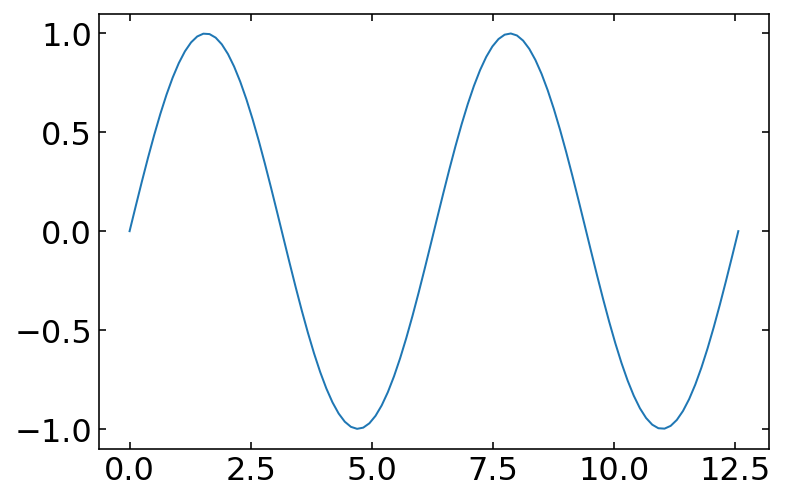

In [3]:
x = np.linspace(0, 4.*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

#### Axis Labels 

We should be always keen to make the diagrams as readable as possible. So we will add some axis labels.

~~~
plt.xlabel('label')
plt.ylabel('label')
~~~


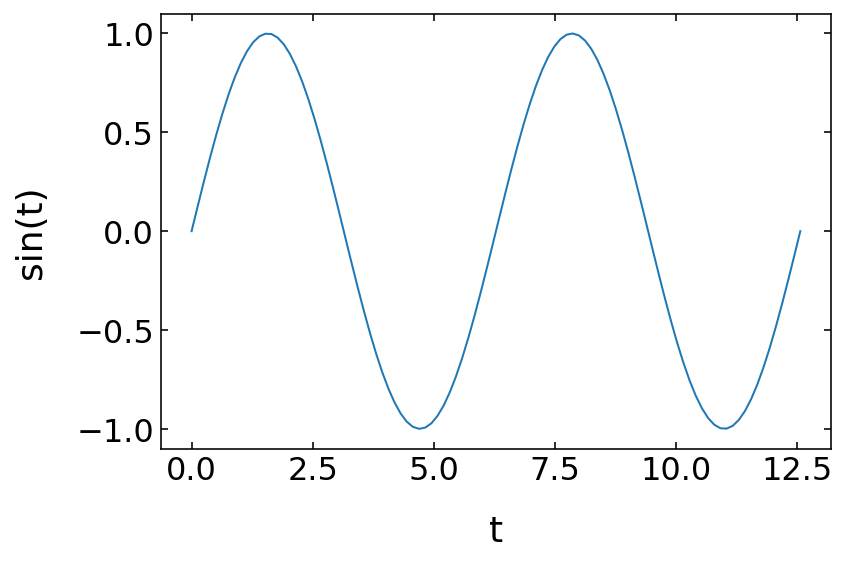

In [4]:
plt.plot(x,np.sin(x)) # using x-axis
plt.xlabel('t') # set the x-axis label
plt.ylabel('sin(t)') # set the y-axis label
plt.show()

#### Legends

~~~
plt.plot(..., label=r'$\sin(x)$')
plt.legend(loc='lower left') 
~~~


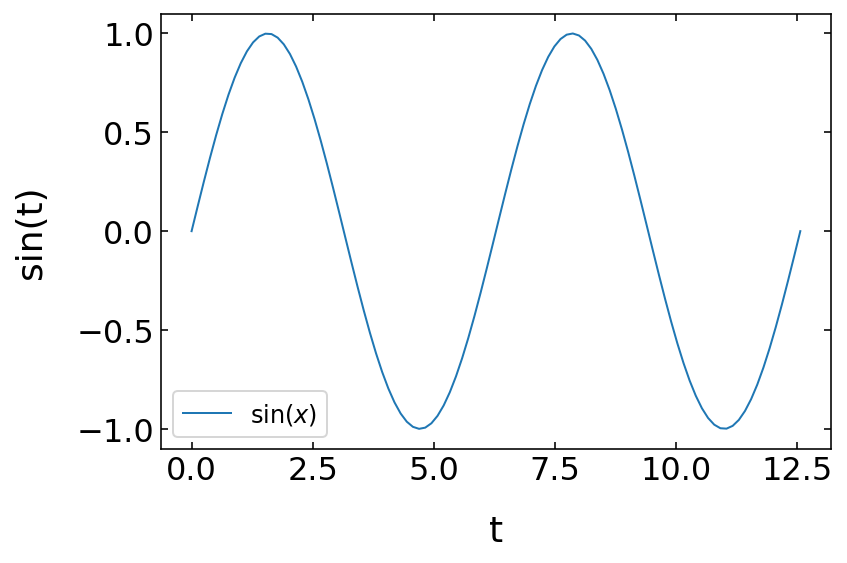

In [5]:
plt.plot(x,np.sin(x),label=r'$\sin(x)$') #define an additional label
plt.xlabel('t')
plt.ylabel('sin(t)') 

plt.legend(loc='lower left') #add the legend 
plt.show()

### Scatter plot

If you prefer to use symbols for plotting just use the 

~~~
plt.scatter(x,y)
~~~

command of pylab. Note that the scatter command requires a *x* and *y* values and you can set the marker symbol (see an overview of the [marker symbols](https://matplotlib.org/api/markers_api.html)). 

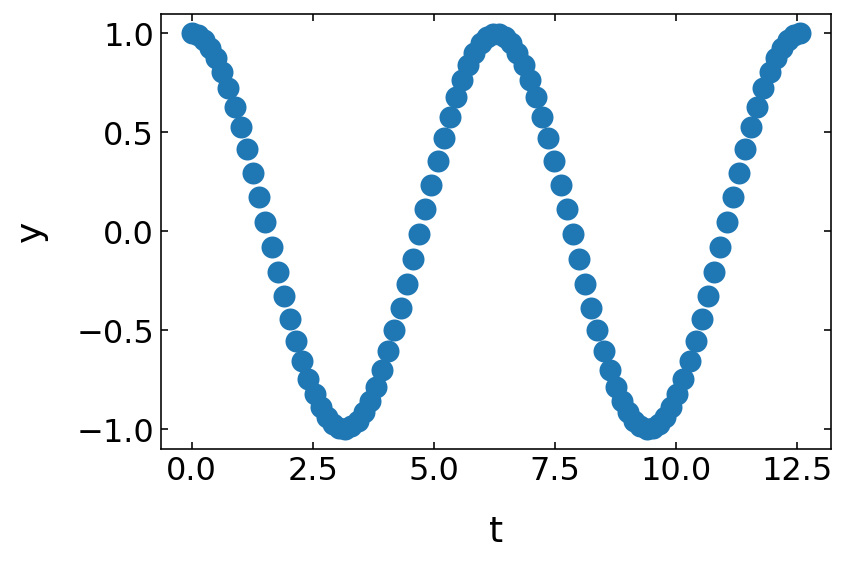

In [6]:
plt.scatter(x,np.cos(x),marker='o')
plt.xlabel('t') # set the x-axis label
plt.ylabel('y') # set the y-axis label
plt.show()

### Histograms

A very useful plotting command is also the *hist* command. It generates a histogram of the data provided. If only the data is given, bins are calculated automatically. If you supply an array of intervalls with *hist(data,bins=b)*, where *b* is and array, the hist command calculates the histogram for the supplied bins. *density=1* normalizes the area below the histogram to 1. The hist command not only returns the graph, but also the occurrences and bins.

<div class="alert alert-info">

**Note:** Physics Interlude
   
Probability density for finding an oscillating particle


</div>

We want to use this occasion to have at least some physics related plotting. Lets have a look at the simple harmonic oscillators in one dimension, which as yoou remember follows the following equation of motion.

\begin{equation}
\ddot{x}(t)=-\omega^{2}x(t)
\end{equation}

Imagine you have a mass on a spring which is at rest at a position $x_{0}$ and at $t=0$ elongated by a distance $\Delta x$. The spring will then start to oscillate according to

\begin{equation}
x(t)=\Delta x \cos(\omega t)
\end{equation}

If you now need to calculate the probability to find the spring at a certain elongation you need to realize that the oscillator spends a different amount of time at different positions.
The time $dt$ spend in the interval [$x(t)$,$x(t)+dx$] depends on the speed, i.e.

\begin{equation}
v(t)=\frac{dx}{dt}=-\omega \Delta x  \sin(\omega t)
\end{equation}


The probability to find the oscillator at a certain intervall then is the fraction of time residing in this intervall normalized by the half the oscillation period $T/2$.

\begin{equation}
\frac{dt}{T/2}=\frac{1}{T/2}\frac{dx}{v(t)}=\frac{1}{T/2}\frac{-dx}{\omega \Delta x  \sin(\omega t)}
\end{equation}

As the frequency of the oscillator is $\omega=2\pi/T$ we can replace $T$ by $T=2\pi/\omega$ which yields

\begin{equation}
p(x)dx=\frac{1}{\pi \Delta x}\frac{dx}{\sqrt{1-\left (\frac{x(t)}{\Delta x}\right )^2}}
\end{equation}


This is the probability density of finding an oscillating spring at a certain elongation $x(t)$. If you look at the example more closely, it tells you, that you find and elongation more likely when the speed of the mass is slow. This is even a more general issue in non-equilibrium physics. If cells or cars are moving with variable speed, they are more likely to be found at places where they are slow. 

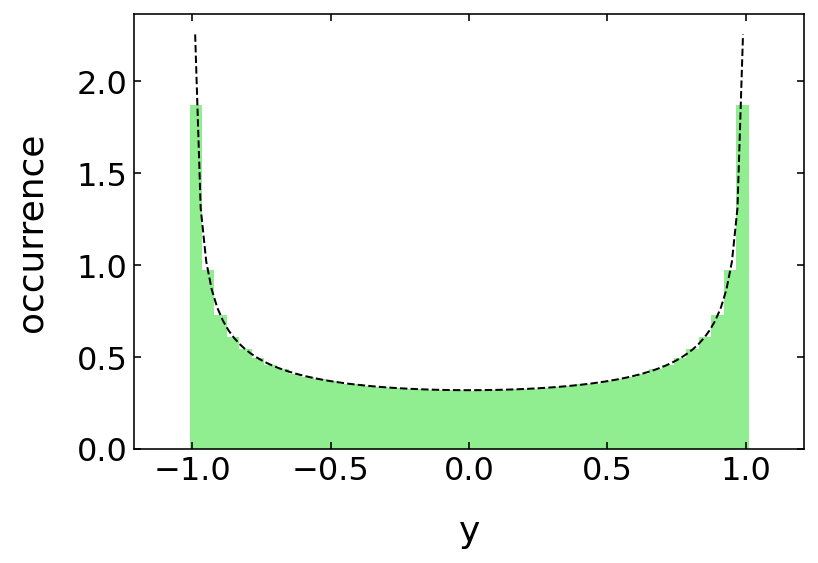

In [7]:
t=np.linspace(0,np.pi,10000)
b=np.linspace(-1.1,1.1,50)

# plot the histogram
n, bins, patches=plt.hist(np.cos(t),bins=b,density=1,color='lightgreen')

#plot the analytical solution
x=np.linspace(-0.99,0.99,100)
plt.plot(x,1/(np.pi*np.sqrt(1-x**2)),'k--');

plt.xlabel('y') # set the x-axis label
plt.ylabel('occurrence') # set the y-axis label
plt.show()

### Combined plots

You can combine multiple data with the same axes by stacking multiple plots.


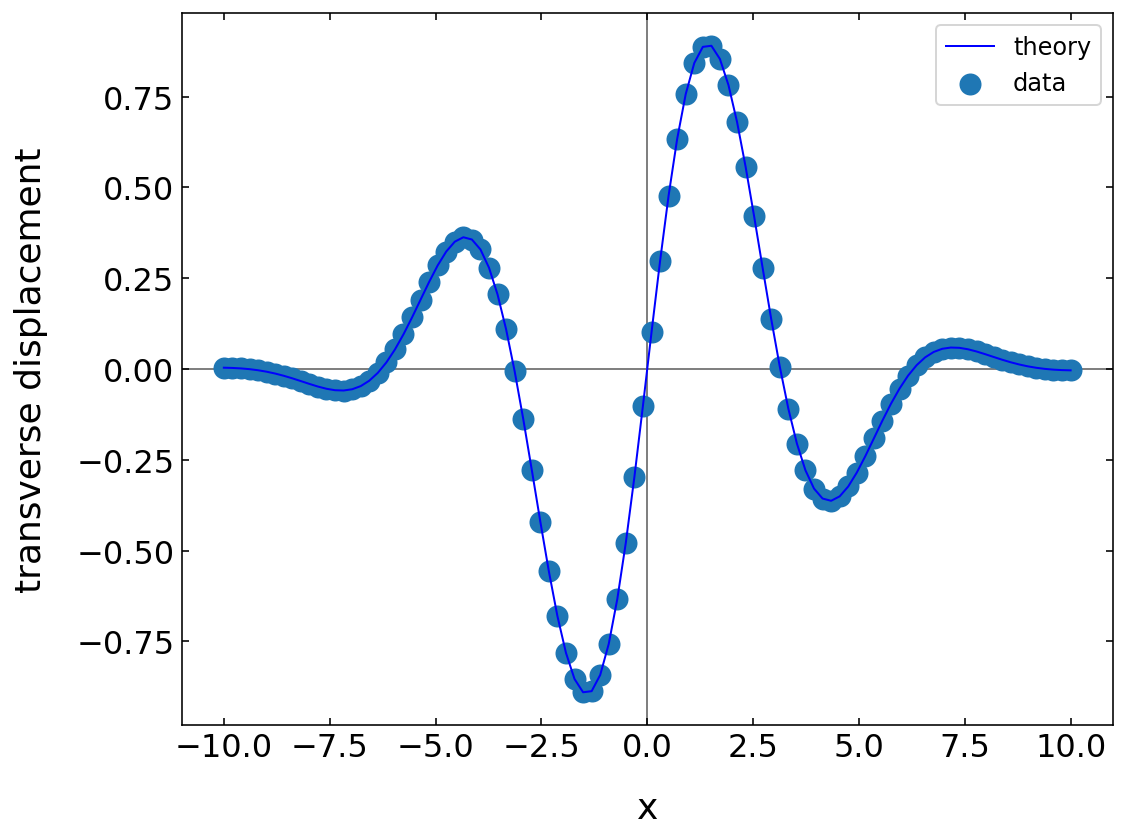

In [8]:
# create x and y arrays for theory
x = np.linspace(-10., 10., 100)
y = np.sin(x) * np.exp(-(x/4.47)**2)

# create plot
plt.figure(figsize = (8,6))

plt.plot(x, y, 'b-', label='theory')
plt.scatter(x, y,  label="data")

plt.axhline(color = 'gray', zorder=-1)
plt.axvline(color = 'gray', zorder=-1)


plt.xlabel('x')
plt.ylabel('transverse displacement')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Plots with error bars

When plotting experimental data it is customary to include error bars that indicate graphically the degree of uncertainty that exists in the measurement of each data point. The MatPlotLib function errorbar plots data with error bars attached. It can be used in a way that either replaces or augments the plot function. Both vertical and horizontal error bars can be displayed. The figure below illustrates the use of error bars.

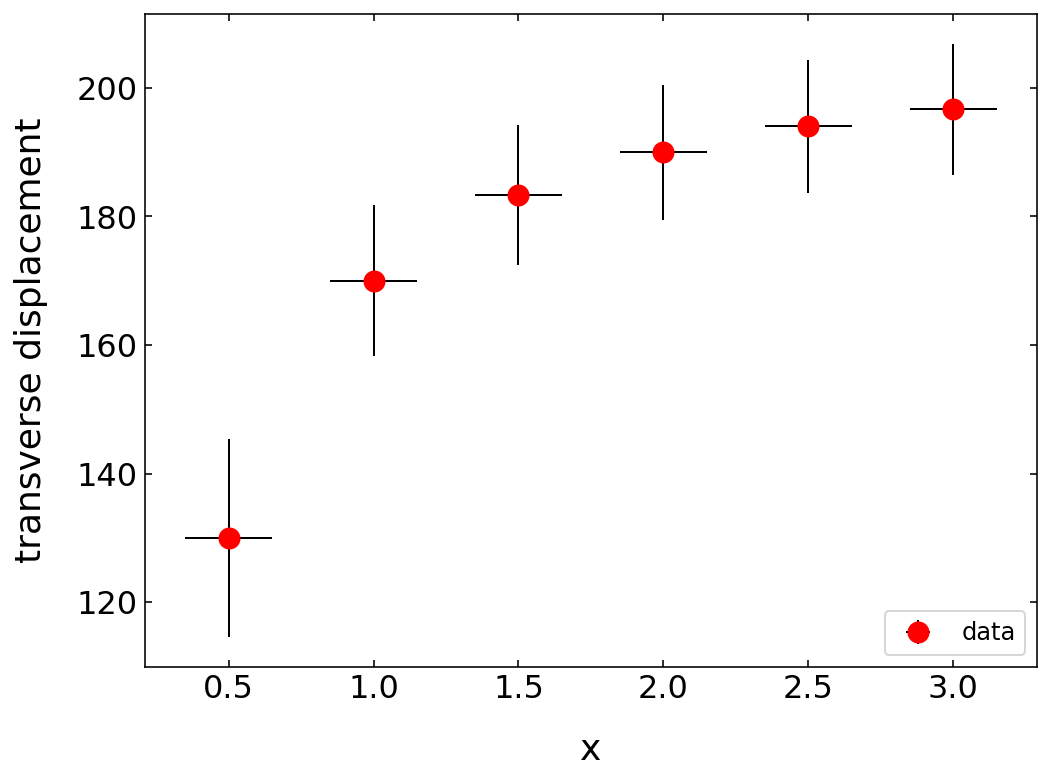

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# create plot
plt.figure(1, figsize = (8,6) )
xdata=np.arange(0.5,3.5,0.5)
ydata=210-40/xdata

yerror=2e3/ydata

plt.errorbar(xdata, ydata, fmt="ro", label="data",
             xerr=0.15, yerr=yerror, ecolor="black")

plt.xlabel("x")
plt.ylabel("transverse displacement")
plt.legend(loc="lower right")

# save plot to file
plt.savefig("Experimental.pdf")
# display plot on screen
plt.show()

### Setting plotting limits and excluding data

If you want to zoom in to s specific region of a plot you can set the limits of the individual axes.

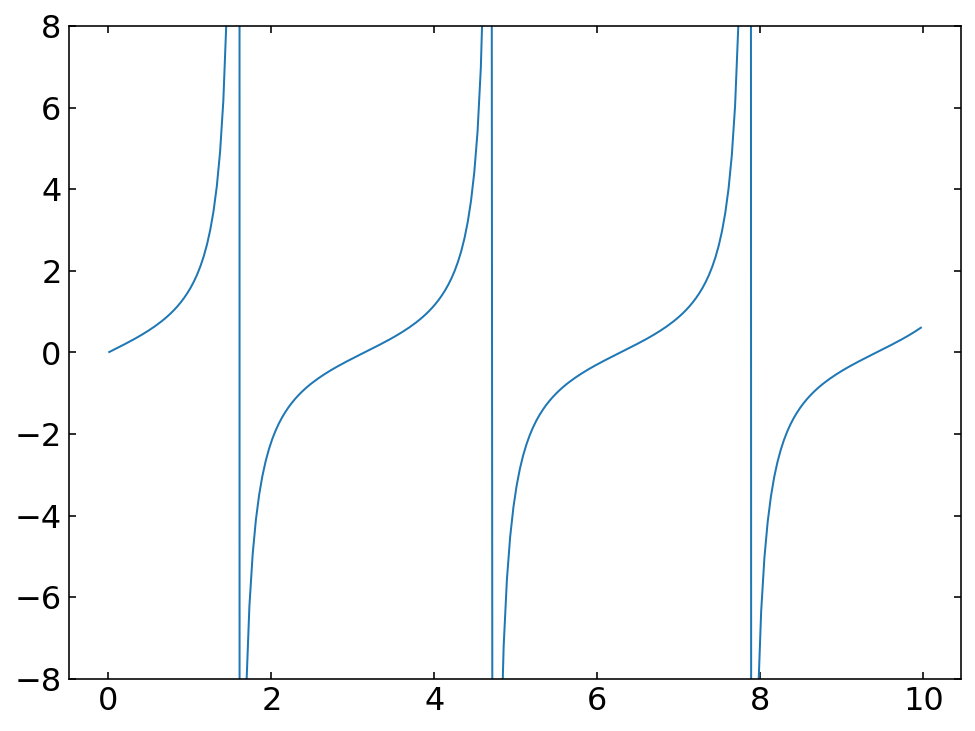

In [10]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.arange(0.01, 10., 0.04)
ytan = np.tan(theta)
plt.figure(figsize=(8,6))
plt.plot(theta, ytan)
plt.ylim(-8, 8) # restricts range of y axis from -8 to +8 plt.axhline(color="gray", zorder=-1)
plt.show()

#### Masked arrays

Sometimes you encounter situations, when you wish to mask some of the data of your plot, because they are not showing real data as the vertical lines in the plot above. For this purpose, you can mask the data arrays in various ways to not show up. The example below uses the

~~~
np.ma.masked_where()
~~~

function of NumPy, which takes a condition as the first argument and what should be returned if that condition is fulfilled.

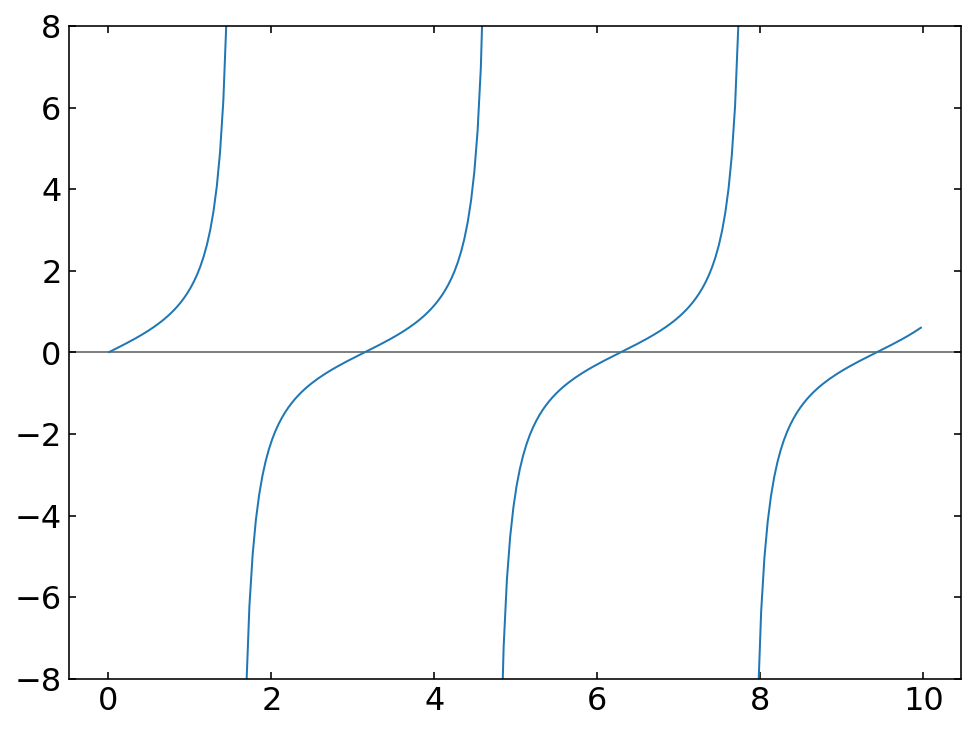

In [13]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.arange(0.01, 10., 0.04)
ytan = np.tan(theta)

#exclude specific data from plotting
ytanM = np.ma.masked_where(np.abs(ytan)>20., ytan)

plt.figure(figsize=(8,6))
plt.plot(theta, ytanM)
plt.ylim(-8, 8)
plt.axhline(color="gray", zorder=-1)
plt.show()

##  Logarithmic plots
 
 Data sets can span many orders of magnitude from fractional quantities much smaller than unity to values much larger than unity. In such cases it is often useful to plot the data on logarithmic axes.

### Semi-log plots


For data sets that vary exponentially in the independent variable, it is often useful to use one or more logarithmic axes. Radioactive decay of unstable nuclei, for example, exhibits an exponential decrease in the number of particles emitted from the nuclei as a function of time.

MatPlotLib provides two functions for making semi-logarithmic plots, semilogx and semilogy, for creating plots with logarithmic x and y axes, with linear y and x axes, respectively. We illustrate their use in the program below, which made the above plots.

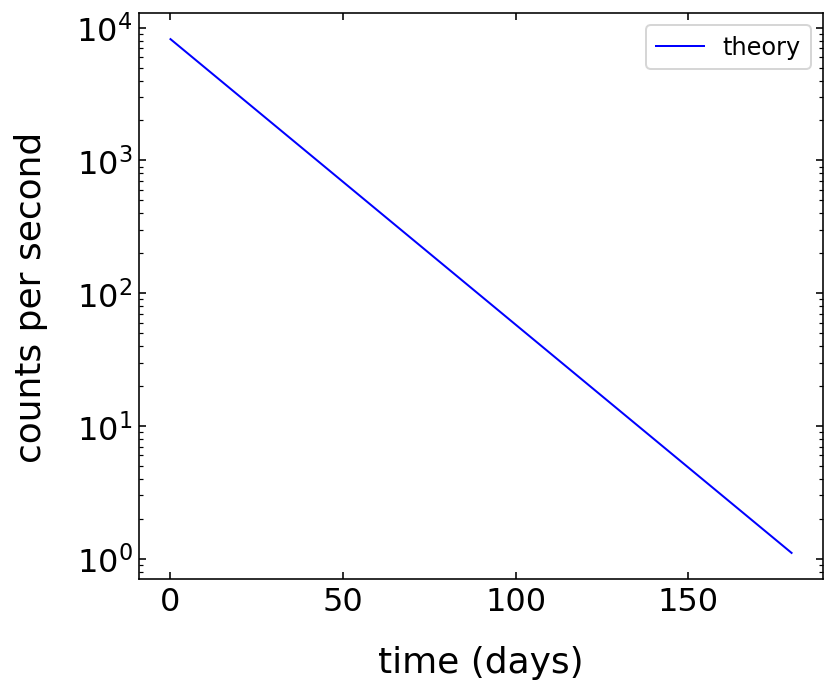

In [17]:
# create theoretical curve
tau = 20.2 # Phosphorus-32 half life = 14 days; tau = t_half/ln(2)
N0 = 8200. # Initial count rate (per second)
t = np.linspace(0, 180, 128)
N = N0 * np.exp(-t/tau)

# create plot
plt.figure(1, figsize = (6,5) )

plt.semilogy(t, N, 'b-', label="theory")
#plt.semilogy(time, counts, 'ro', label="data")
plt.xlabel('time (days)')
plt.ylabel('counts per second')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Log-log plots

MatPlotLib can also make log-log or double-logarithmic plots using the function loglog. It is useful when both the $x$ and $y$ data span many orders of magnitude. Data that are described by a power law $y=Ax^b$, where $A$ and $b$ are constants, appear as straight lines when plotted on a log-log plot. Again, the loglog function works just like the plot function but with logarithmic axes.

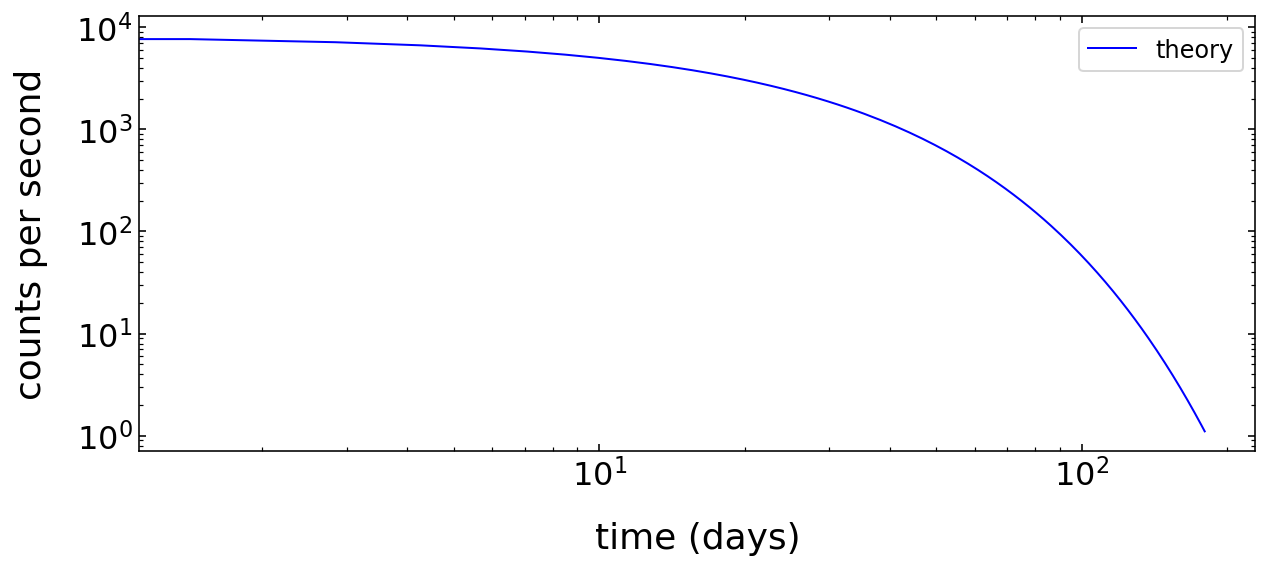

In [103]:
# create theoretical fitting curve
tau = 20.2 # Phosphorus-32 half life = 14 days; tau = t_half/ln(2)
N0 = 8200. # Initial count rate (per second)
t = np.linspace(0, 180, 128)
N = N0 * np.exp(-t/tau)

# create plot
plt.figure(1, figsize = (10,4) )
plt.loglog(t, N, 'b-', label="theory")
#plt.plot(time, counts, 'ro', label="data")
plt.xlabel('time (days)')
plt.ylabel('counts per second')
plt.legend(loc='upper right')
plt.show()


## Arranging multiple plots


Often you want to create two or more graphs and place them next to one another, generally because they are related to each other in some way.

The function subplot, called on lines 13 and 24, creates the two subplots in the above figure. subplot has three arguments. The first specifies the number of rows that the figure space is to be divided into; on line 13, it’s two. The second specifies the number of columns that the figure space is to be divided into; on line 13, it’s one. The third argument specifies which rectangle the will contain the plot specified by the following function calls. Line 13 specifies that the plotting commands that follow will be act on the first box. Line 24 specifies that the plotting commands that follow will be act on the second box.

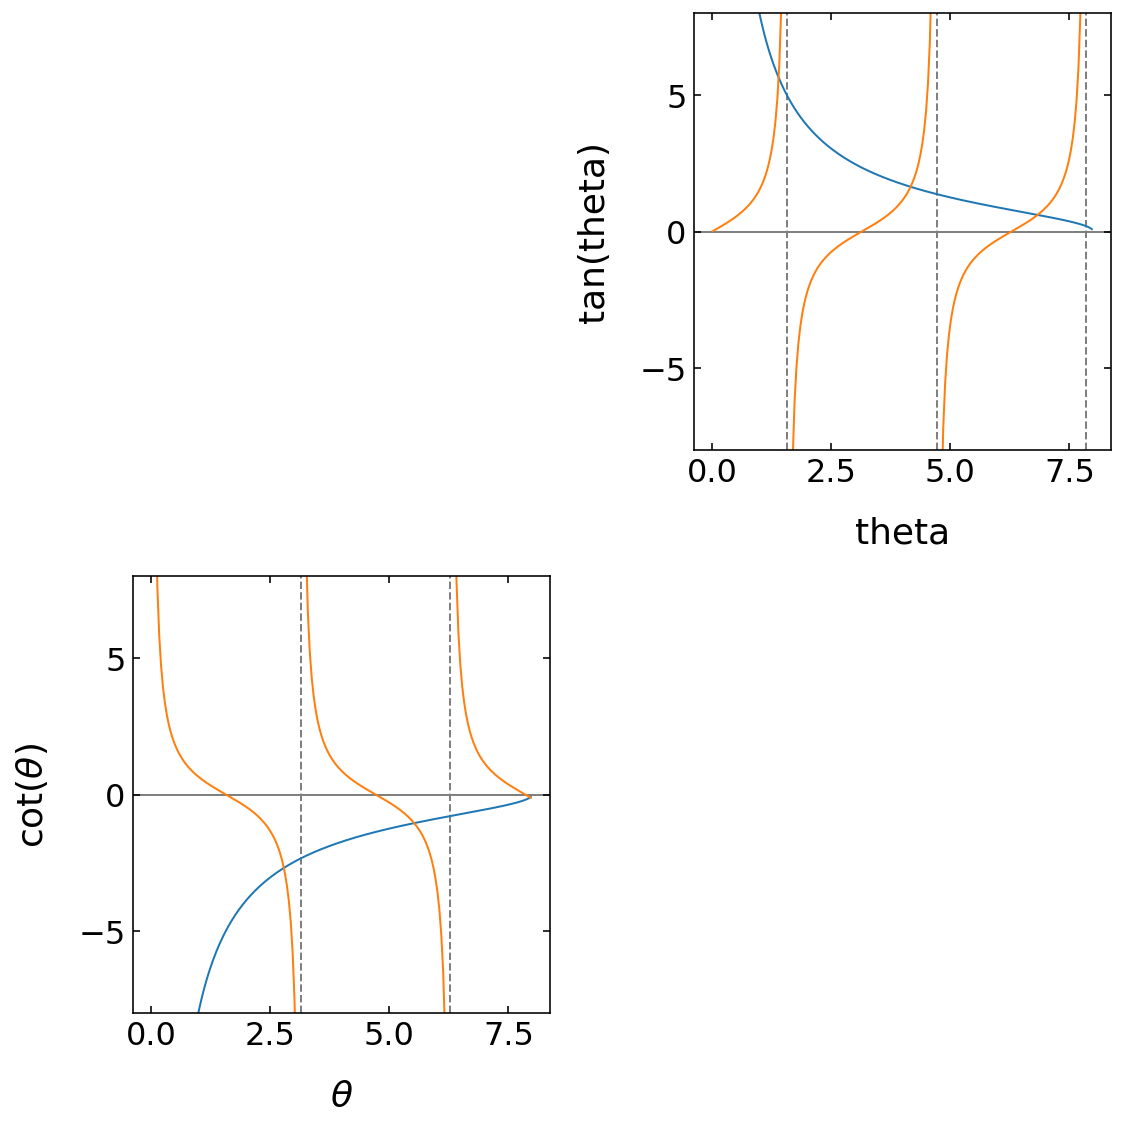

In [14]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.arange(0.01, 8., 0.04)
y = np.sqrt((8./theta)**2-1.)
ytan = np.tan(theta)
ytan = np.ma.masked_where(np.abs(ytan)>20., ytan)
ycot = 1./np.tan(theta)

ycot = np.ma.masked_where(np.abs(ycot)>20., ycot)
plt.figure(1,figsize=(8,8))
plt.subplot(2, 2, 2)
plt.plot(theta, y)
plt.plot(theta, ytan)
plt.ylim(-8, 8)
plt.axhline(color="gray", zorder=-1)
plt.axvline(x=np.pi/2., color="gray", linestyle="--", zorder=-1)
plt.axvline(x=3.*np.pi/2., color="gray", linestyle="--", zorder=-1)
plt.axvline(x=5.*np.pi/2., color="gray", linestyle="--", zorder=-1)
plt.xlabel("theta")
plt.ylabel("tan(theta)")

plt.subplot(2, 2, 3)
plt.plot(theta, -y)
plt.plot(theta, ycot)
plt.ylim(-8, 8)
plt.axhline(color="gray", zorder=-1)
plt.axvline(x=np.pi, color="gray", linestyle="--", zorder=-1)
plt.axvline(x=2.*np.pi, color="gray", linestyle="--", zorder=-1)
plt.xlabel(r'$\theta$')
plt.ylabel(r'cot($\theta$)')

plt.tight_layout()
plt.show()

## Contour and Density Plots

A contour plots are useful tools to study two dimensional data, meaning $Z(X,Y)$. A contour plots isolines of the function $Z$.

### Simple contour plot

<div class="alert alert-info">

**Note:** Physics Interlude
   
Interference of spherical waves


</div>


We want to use contour plots to explore the interference of two spherical waves. 
A spherical wave can be given by a complex spatial amplitude

\begin{equation}
U(r)=U_{0}\frac{e^{-i\,k r}}{r}
\end{equation}

where $U_{0}$ is the amplitude, $k$ the magnitude of the k-vector, i.e. $k=2\pi/\lambda$ and $r=\sqrt{x^2+y^2}$ the distance, here in 2 dimensions.

To show interference, we just use two of those waves as a superposition. 

\begin{equation}
U(r)=U_{01}\frac{e^{-i\,k r}}{r}+U_{02}\frac{e^{-i\,k r}}{r}
\end{equation}

The intensity of the wave at a position is then related to the magnitude square of the wavefunction

\begin{equation}
I(r)=|U(r)|^2
\end{equation}

To keep it simple we will skip the $1/r$ amplitude decay. 

In [104]:
lmda = 2 # defines the wavelength 
x01=1.5*np.pi # location of the first source, y01=0
x02=2.5*np.pi # location of the second source, y02=0
x = np.linspace(0, 4*np.pi, 100)
y = np.linspace(0, 4*np.pi, 100)


X, Y = np.meshgrid(x, y)
Z= np.abs( np.exp(-1j*np.sqrt((X-x01)**2+Y**2)*2*np.pi/lmda)+np.exp(-1j*np.sqrt((X-x02)**2+Y**2)*2*np.pi/lmda))**2

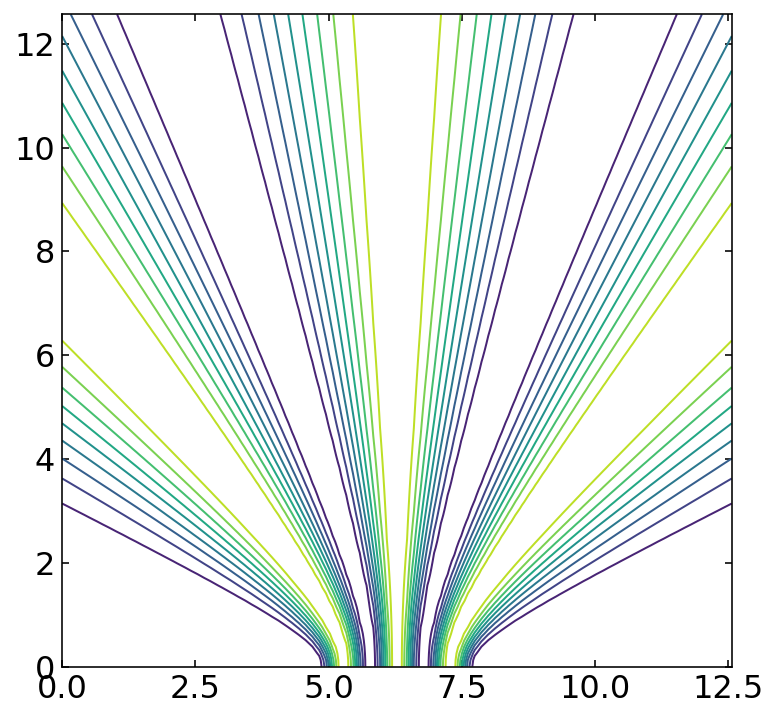

In [106]:
plt.figure(1,figsize=(6,6))

#contour plot
plt.contour(X, Y, Z, 10)
plt.show()

### Color contour plot

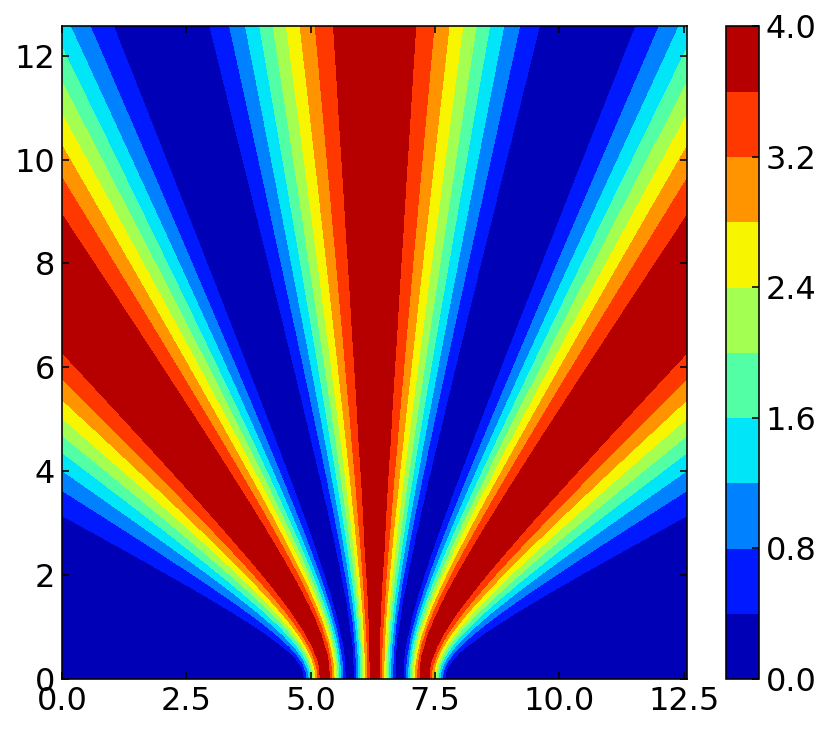

In [107]:
plt.figure(1,figsize=(7,6))
plt.contourf(X, Y, Z, 10, cmap='jet')
plt.colorbar()
plt.show()

### Image plot

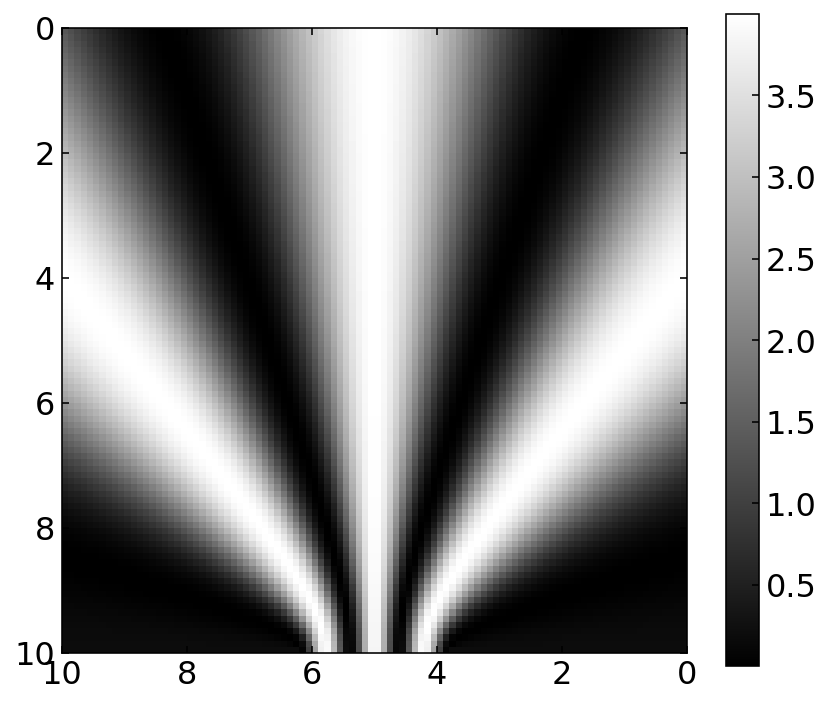

In [108]:
plt.figure(1,figsize=(7,6))
plt.imshow(Z,extent=[10,0,0,10],cmap='gray');
plt.ylim(10,0)
plt.colorbar()
plt.show()

## 3D Plotting

Matplotlib was initially designed with only two-dimensional plotting in mind. Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization. Three-dimensional plots are enabled by importing the mplot3d toolkit, included with the main Matplotlib installation:

In [109]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword projection='3d' to any of the normal axes creation routines:

### Projection Scence

Text(0.5, 0, 'z')

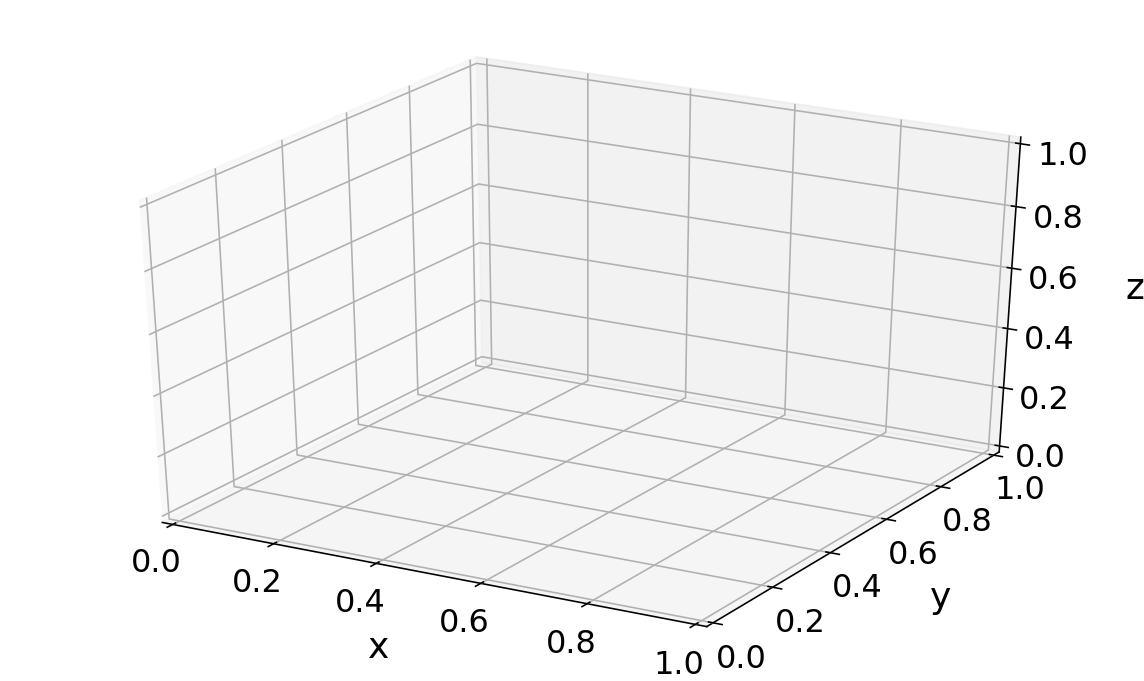

In [110]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use %matplotlib notebook rather than %matplotlib inline when running this code.

### Line Plotting in 3D

from sets of (x, y, z) triples. In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ax.plot3D and ax.scatter3D functions. The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to Simple Line Plots and Simple Scatter Plots for more information on controlling the output. Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

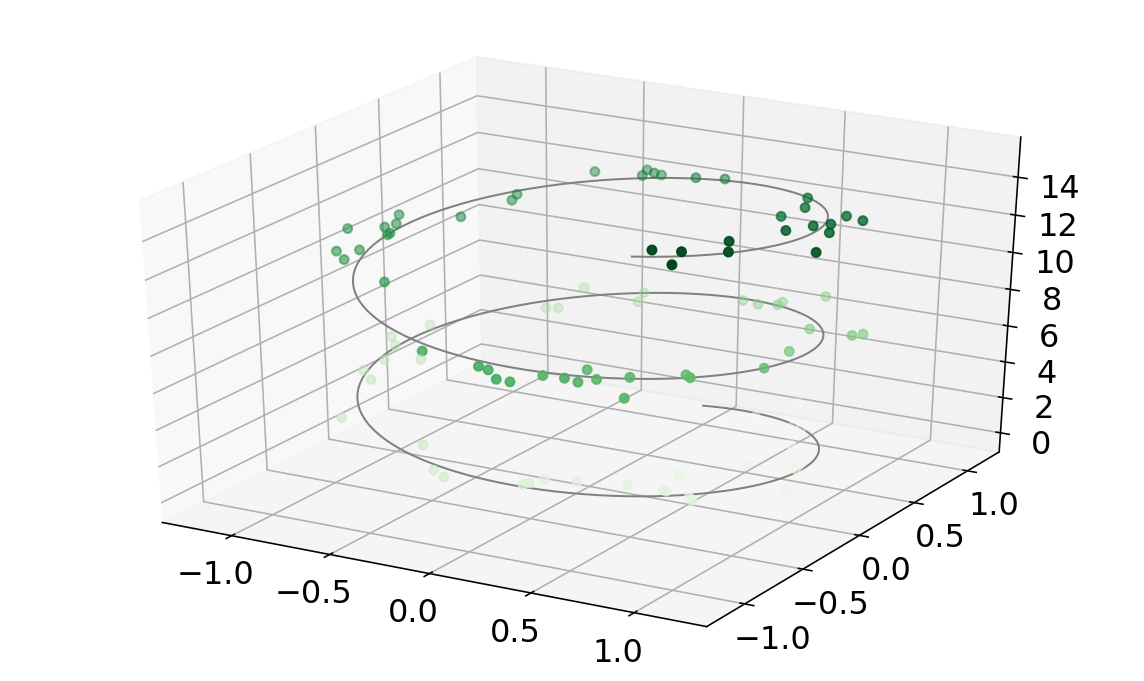

In [111]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page. While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points. Use the *scatter3D* or the *plot3D* method to plot a random walk in 3-dimensions in your exercise.

### Surface Plotting 

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

In [112]:
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 60)

X, Y = np.meshgrid(x, y)
Z=np.sin(X)*np.sin(Y)

In [113]:
np.shape(Z)

(60, 50)

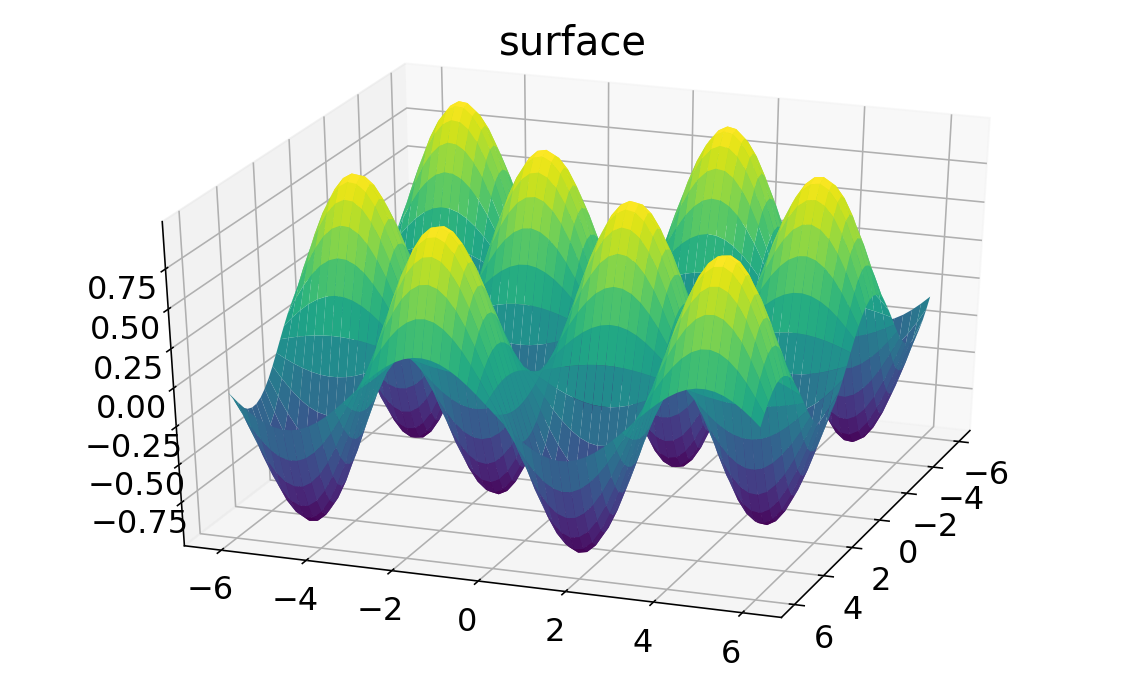

In [114]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.view_init(30, 20)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

## Advanced Plotting

While we have so far largely relied on the default setting and the automatic arrangement of plots, there is also a way to precisely design your plot. Python provides the tools of object oriented programming and thus modules provide classes which can be instanced into objects. This is also the case 